<a href="https://colab.research.google.com/github/GauravShinde013/SLT/blob/main/Version3SLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import shutil

# Path to the directory you want to delete
directory = '/content/Extracted_Frames'

# Delete the directory and its contents
shutil.rmtree(directory, ignore_errors=True)

print(f'Deleted {directory}')


Deleted /content/Extracted_Frames


In [ ]:
import re
import os
import cv2
import logging
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

logging.basicConfig(level=logging.INFO)

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


# Step 4: Model Training with Early Stopping and Plotting Curves

In [ ]:
# /content/drive/MyDrive/DSL-10Dataset

In [ ]:
# Install unrar
!apt-get install -y unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import os

# Path to the .rar file and extraction directory
rar_path = '/content/drive/MyDrive/DSL-10Dataset/Videos.rar'
extraction_path = '/content/DSL-10Dataset'

# Make sure the extraction directory exists
os.makedirs(extraction_path, exist_ok=True)

# Extract the .rar file
!unrar x -r {rar_path} {extraction_path}
print("Dataset extracted successfully!")

# Verify extraction
extracted_files = os.listdir(extraction_path)
print(f"Files in extraction directory: {extracted_files}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/DSL-10Dataset/Videos.rar

Creating    /content/DSL-10Dataset/Videos                             OK
Creating    /content/DSL-10Dataset/Videos/hello                       OK
Extracting  /content/DSL-10Dataset/Videos/hello/hello_0.avi                0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_1.avi                0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_10.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_11.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/hello/hello_12.avi               0%  OK 
Extracting  /content/DSL-10Dataset/Videos/h

In [ ]:
import os

# Path to the extracted dataset
dataset_path = '/content/DSL-10Dataset/Videos'

# Verify the presence of video files in each word directory
words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

for word in words:
    video_dir = os.path.join(dataset_path, word)
    if os.path.exists(video_dir):
        video_files = [f for f in os.listdir(video_dir) if f.endswith('.avi')]
        print(f"{word} directory contains {len(video_files)} video files")
    else:
        print(f"Directory for {word} does not exist")


hello directory contains 75 video files
howAre directory contains 75 video files
love directory contains 75 video files
mask directory contains 75 video files
no directory contains 75 video files
please directory contains 75 video files
sorry directory contains 75 video files
thanks directory contains 75 video files
wear directory contains 75 video files
you directory contains 75 video files


In [ ]:
import cv2

def extract_frames(video_path, output_dir, size=(640, 480)):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, size)
        frame_path = os.path.join(output_dir, f'frame_{frame_count:03d}.png')
        print("Saving frame.... ", frame_path)
        cv2.imwrite(frame_path, frame)
        frame_count += 1
    cap.release()
    print(f"Extracted {frame_count} frames from {video_path} to {output_dir}")

dataset_path = '/content/DSL-10Dataset/Videos'
output_base_path = '/content/Extracted_Frames'
os.makedirs(output_base_path, exist_ok=True)

words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

for word in words:
    video_dir = os.path.join(dataset_path, word)
    output_dir = os.path.join(output_base_path, word)
    os.makedirs(output_dir, exist_ok=True)
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.avi')]
    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        video_output_dir = os.path.join(output_dir, os.path.splitext(video_file)[0])
        os.makedirs(video_output_dir, exist_ok=True)
        extract_frames(video_path, video_output_dir)
    print(f"Frames extracted for word: {word}")


Streaming output truncated to the last 5000 lines.
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_025.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_026.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_027.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_028.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_49/frame_029.png
Extracted 30 frames from /content/DSL-10Dataset/Videos/thanks/thanks_49.avi to /content/Extracted_Frames/thanks/thanks_49
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_000.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_001.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_002.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_003.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_004.png
Saving frame....  /content/Extracted_Frames/thanks/thanks_36/frame_005.png
Sa

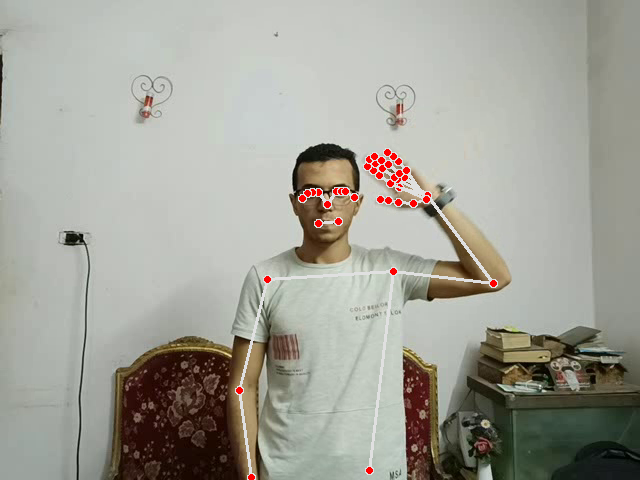

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils

def extract_keypoints_for_visualization(frame):
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        return results

def visualize_keypoints(frame, results):
    mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    cv2_imshow(frame)

# Visualize keypoints for a random frame
random_frame_path = '/content/Extracted_Frames/hello/hello_0/frame_027.png'
random_frame = cv2.imread(random_frame_path)

if random_frame is not None:
    random_results = extract_keypoints_for_visualization(random_frame)
    visualize_keypoints(random_frame, random_results)
else:
    print(f"Error: Unable to read the image from {random_frame_path}")


In [ ]:
import mediapipe as mp
import numpy as np
import os
import cv2

mp_holistic = mp.solutions.holistic

def extract_keypoints(frame):
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        keypoints = []
        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.left_hand_landmarks:
            for landmark in results.left_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.right_hand_landmarks:
            for landmark in results.right_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        keypoints.extend([0] * (258 - len(keypoints)))  # Ensure the keypoints array has a fixed size
        return keypoints

def process_frames_and_extract_keypoints(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for frame_name in os.listdir(input_dir):
        if frame_name.endswith('.png'):
            frame_path = os.path.join(input_dir, frame_name)
            frame = cv2.imread(frame_path)
            keypoints = extract_keypoints(frame)
            keypoints_path = os.path.join(output_dir, f'{frame_name[:-4]}.npy')
            np.save(keypoints_path, keypoints)
            print(f"Saved keypoints for frame {frame_name} to {keypoints_path}")

dataset_path = '/content/DSL-10Dataset/Videos'
output_base_path = '/content/Extracted_Frames'
words = ['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry', 'thanks', 'wear', 'you']

for word in words:
    word_dir = os.path.join(output_base_path, word)
    for video_dir in os.listdir(word_dir):
        video_input_dir = os.path.join(word_dir, video_dir)
        video_output_dir = os.path.join(word_dir, f'{video_dir}_keypoints')
        process_frames_and_extract_keypoints(video_input_dir, video_output_dir)
    print(f"Keypoints extracted for word: {word}")


Streaming output truncated to the last 5000 lines.
Saved keypoints for frame frame_007.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_007.npy
Saved keypoints for frame frame_015.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_015.npy
Saved keypoints for frame frame_019.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_019.npy
Saved keypoints for frame frame_016.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_016.npy
Saved keypoints for frame frame_018.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_018.npy
Saved keypoints for frame frame_014.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_014.npy
Saved keypoints for frame frame_011.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_011.npy
Saved keypoints for frame frame_005.png to /content/Extracted_Frames/thanks/thanks_21_keypoints/frame_005.npy
Saved keypoints for frame frame_008.png to /content/Extracted_Frames/

In [ ]:
import shutil

# Path to your Google Drive
drive_path = '/content/drive/MyDrive/Extracted_Keypoints'

# Create the directory if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Copy the extracted keypoints directory to your Google Drive
shutil.copytree('/content/Extracted_Frames', os.path.join(drive_path, 'Extracted_Frames'), dirs_exist_ok=True)

print("Extracted keypoints saved to Google Drive")


Extracted keypoints saved to Google Drive


Loaded data shape: (22500, 258), Labels shape: (22500, 10)
Reshaped data shape: (22500, 1, 258)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2967 - loss: 1.8431 - val_accuracy: 0.6471 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6212 - loss: 0.9780 - val_accuracy: 0.8633 - val_loss: 0.5203 - learning_rate: 0.0010
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7693 - loss: 0.6569 - val_accuracy: 0.9136 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8183 - loss: 0.5162 - val_accuracy: 0.9262 - val_loss: 0.2612 - learning_rate: 0.0010
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.4329 - val_accuracy: 0.9322 - val_loss: 0.2233 - learning_rate: 0.0010
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.3882 - val_accuracy: 0.9469 - val_loss: 0.2022 - learning_rate: 0.0010
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8773 - loss: 0.

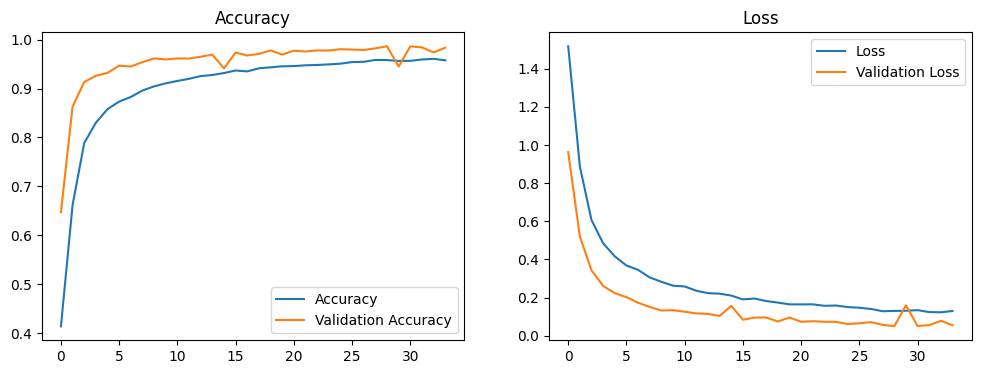

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0414
Test accuracy: 0.9866666793823242


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def load_data(base_dir, words):
    X, y = [], []
    for i, word in enumerate(words):
        keypoints_dir = os.path.join(base_dir, word)
        for video_dir in os.listdir(keypoints_dir):
            video_keypoints_dir = os.path.join(keypoints_dir, f'{video_dir}_keypoints')
            if not os.path.exists(video_keypoints_dir):
                continue
            for keypoint_file in os.listdir(video_keypoints_dir):
                if keypoint_file.endswith('.npy'):
                    keypoints = np.load(os.path.join(video_keypoints_dir, keypoint_file), allow_pickle=True)
                    if len(keypoints) != 258:
                        continue
                    X.append(keypoints)
                    y.append(i)
    X = np.array(X)
    y = tf.keras.utils.to_categorical(y, num_classes=len(words))
    return X, y



In [ ]:
# Load data
output_base_path = '/content/Extracted_Frames'
X, y = load_data(output_base_path, words)
print(f"Loaded data shape: {X.shape}, Labels shape: {y.shape}")

# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(f"Reshaped data shape: {X.shape}")

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_lstm_model(input_shape, len(words))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping, reduce_lr])

In [ ]:
# Plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_learning_curves(history)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the predicted text and the true text
print("Predictions on test data:")
for i in range(len(y_pred_classes)):
    predicted_text = words[y_pred_classes[i]]  # Convert the predicted class index to text
    true_text = words[y_true_classes[i]]  # Convert the true class index to text
    print(f"Sample {i+1}: Predicted text: {predicted_text}, True text: {true_text}")

In [ ]:
# Save the model in Keras format
model.save('/content/drive/MyDrive/sign_language_model.keras')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
!pip install gtts

In [ ]:
!pip install opencv-python numpy


In [30]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/ISL_CSLRT_Corpus/corpus_csv_files/ISL_CSLRT_Corpus_details.csv'
df = pd.read_csv(csv_file_path)

# Create a subset of the DataFrame with only a few videos
df_subset = df.head(10)


In [ ]:
df_subset.head()

,Sentences,Frames Path
0,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
1,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
2,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
3,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
4,are you free today,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...


In [33]:
import cv2
import os
import numpy as np

def resize_and_change_fps(input_video_path, output_video_path, size=(640, 480), fps=35):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Cannot open video file {input_video_path}")
        return

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, size)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, size)
        out.write(frame)

    cap.release()
    out.release()
    print(f"Resized and saved video: {output_video_path}")


def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def remove_duplicate_frames(input_video_path, output_dir, mse_threshold=30):
    cap = cv2.VideoCapture(input_video_path)
    previous_frame = None
    frame_count = 0
    skipped_count = 0

    # Ensure the output directories exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    skipped_dir = os.path.join(output_dir, 'Skipped_Frames')
    if not os.path.exists(skipped_dir):
        os.makedirs(skipped_dir)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if previous_frame is not None:
            error = mse(previous_frame, frame)
            if error < mse_threshold:
                # Save the skipped frame
                skipped_frame_path = os.path.join(skipped_dir, f'skipped_frame_{skipped_count:04d}.png')
                cv2.imwrite(skipped_frame_path, frame)
                print(f"Skipping duplicate frame {frame_count} and saved to {skipped_frame_path}")
                skipped_count += 1
                continue

        # Save unique frame
        frame_path = os.path.join(output_dir, f'frame_{frame_count:04d}.png')
        cv2.imwrite(frame_path, frame)
        print(f"Saved frame: {frame_path}")
        frame_count += 1
        previous_frame = frame

    cap.release()
    print(f"Extracted {frame_count} frames from {input_video_path} to {output_dir}")


import os

def preprocess_videos(df):
    # Ensure the output directory exists
    if not os.path.exists('Processed_Frames'):
        os.makedirs('Processed_Frames')

    for index, row in df.iterrows():
        try:
            # Get the sentence and video path, ensuring the sentence is a string
            sentence = str(row['Sentences']) if pd.notna(row['Sentences']) else None
            video_path = '/content/drive/MyDrive/' + row['Frames Path'].replace('\\', '/')

            if sentence is None:
                raise ValueError(f"Invalid or missing sentence at row {index}")

            output_video_path = video_path.replace('.MP4', '_resized.mp4')
            output_frames_dir = os.path.join('Processed_Frames', sentence)

            # Step 1: Resize and change FPS
            resize_and_change_fps(video_path, output_video_path)

            # Step 2: Remove duplicate frames
            remove_duplicate_frames(output_video_path, output_frames_dir)
            print(f"Processed: {video_path} and saved frames to {output_frames_dir}")

        except Exception as e:
            # Print error information and continue with the next row
            print(f"Error processing row {index}: {e}")
            print(f"Skipped video path: {row['Frames Path']} with sentence: {row['Sentences']}")
            continue


In [32]:
# Preprocess complete dataset
preprocess_videos(df)

Streaming output truncated to the last 5000 lines.
Saved frame: Processed_Frames/which collegeschool are you from/frame_0124.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0125.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0126.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0127.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0128.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0129.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0130.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0131.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0132.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0133.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0134.png
Saved frame: Processed_Frames/which collegeschool are you from/frame_0135.png
Saved frame: 

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float'

In [40]:
import shutil
import os

# Define source directory (where the frames are currently saved in Colab)
source_dir = '/content/Processed_Frames'

# Define destination directory (where you want to copy the frames to in Google Drive)
destination_dir = '/content/drive/MyDrive/Processed_Frames'

# Ensure the destination directory exists
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the contents of the directory instead of the directory itself
for item in os.listdir(source_dir):
    s = os.path.join(source_dir, item)
    d = os.path.join(destination_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)  # dirs_exist_ok=True allows copying into existing directories
    else:
        shutil.copy2(s, d)

print(f"Processed frames have been copied to {destination_dir}")


# # Optionally, remove the original directory from Colab to free up space
# shutil.rmtree(source_dir)
# print(f"Local directory {source_dir} has been deleted.")


Processed frames have been copied to /content/drive/MyDrive/Processed_Frames


In [41]:

import os
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic

'''
This function is responsible for extracting keypoints (pose, hand landmarks) from a single video frame using the MediaPipe Holistic model.
Input: Takes a single video frame as input (frame).
Output: Returns the keypoints list, which is a flattened array of keypoint coordinates
'''
def extract_keypoints(frame):
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        keypoints = []
        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.left_hand_landmarks:
            for landmark in results.left_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        if results.right_hand_landmarks:
            for landmark in results.right_hand_landmarks.landmark:
                keypoints.extend([landmark.x, landmark.y, landmark.z])
        keypoints.extend([0] * (258 - len(keypoints)))  # Ensure fixed-size array
        return keypoints

'''
This function iterates over all frames in a given directory,
extracts keypoints for each frame using the extract_keypoints function, and saves them to a specified output directory.
Input:
input_dir: Directory containing the frames (images) to process.
output_dir: Directory where the extracted keypoints will be saved as .npy files.
Output: Saves .npy files containing the keypoints for each frame in the output directory.
'''
def process_frames_and_extract_keypoints(input_dir, output_dir):
    # Ensure the local output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for frame_name in os.listdir(input_dir):
        if frame_name.endswith('.png'):
            frame_path = os.path.join(input_dir, frame_name)
            frame = cv2.imread(frame_path)
            keypoints = extract_keypoints(frame)
            keypoints_path = os.path.join(output_dir, f'{frame_name[:-4]}.npy')
            np.save(keypoints_path, keypoints)
            print(f"Saved keypoints for frame {frame_name} to {keypoints_path}")

    # Copy the extracted keypoints to Google Drive
    google_drive_dir = '/content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT'
    if not os.path.exists(google_drive_dir):
        os.makedirs(google_drive_dir)

    # Copy the entire directory to Google Drive
    destination_dir = os.path.join(google_drive_dir, os.path.basename(output_dir))
    shutil.copytree(output_dir, destination_dir)

def process_all_sentences(processed_frames_dir, extracted_keypoints_dir):
    for sentence in os.listdir(processed_frames_dir):
        input_frames_dir = os.path.join(processed_frames_dir, sentence)
        output_keypoints_dir = os.path.join(extracted_keypoints_dir, sentence)

        print(f"Processing sentence: {sentence}")
        process_frames_and_extract_keypoints(input_frames_dir, output_keypoints_dir)
        print(f"Completed processing for sentence: {sentence}")




In [42]:
# Example usage
processed_frames_dir = 'Processed_Frames'  # Directory where all processed frames are stored
extracted_keypoints_dir = 'Extracted_Keypoints'  # Directory where you want to save the extracted keypoints

# Process all sentences
process_all_sentences(processed_frames_dir, extracted_keypoints_dir)

Streaming output truncated to the last 5000 lines.
Saved keypoints for frame frame_0100.png to Extracted_Keypoints/he is on the way/frame_0100.npy
Saved keypoints for frame frame_0047.png to Extracted_Keypoints/he is on the way/frame_0047.npy
Saved keypoints for frame frame_0031.png to Extracted_Keypoints/he is on the way/frame_0031.npy
Saved keypoints for frame frame_0067.png to Extracted_Keypoints/he is on the way/frame_0067.npy
Saved keypoints for frame frame_0018.png to Extracted_Keypoints/he is on the way/frame_0018.npy
Saved keypoints for frame frame_0080.png to Extracted_Keypoints/he is on the way/frame_0080.npy
Saved keypoints for frame frame_0058.png to Extracted_Keypoints/he is on the way/frame_0058.npy
Saved keypoints for frame frame_0022.png to Extracted_Keypoints/he is on the way/frame_0022.npy
Saved keypoints for frame frame_0062.png to Extracted_Keypoints/he is on the way/frame_0062.npy
Saved keypoints for frame frame_0016.png to Extracted_Keypoints/he is on the way/fram

In [43]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def load_keypoints_data(base_dir):
    X, y, filenames = [], [], []
    sentences = os.listdir(base_dir)
    sentence_to_idx = {sentence: i for i, sentence in enumerate(sentences)}

    for sentence in sentences:
        keypoints_dir = os.path.join(base_dir, sentence)
        for keypoint_file in os.listdir(keypoints_dir):
            if keypoint_file.endswith('.npy'):
                keypoints = np.load(os.path.join(keypoints_dir, keypoint_file))
                X.append(keypoints)
                y.append(sentence_to_idx[sentence])
                filenames.append(os.path.join(keypoints_dir, keypoint_file))  # Save the full path to the keypoint file

    X = np.array(X)
    y = tf.keras.utils.to_categorical(y, num_classes=len(sentences))
    return X, y, filenames, sentences


In [45]:
# Define the directory where the extracted keypoints are stored
extracted_keypoints_dir = '/content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT'

# Load data and filenames
X, y, filenames, sentences = load_keypoints_data(extracted_keypoints_dir)

# Verify the loaded data
print(f"Loaded {len(X)} samples from {len(sentences)} sentences.")
print(f"Sentences: {sentences}")
print(f"First 5 filenames: {filenames[:5]}")


Loaded 10626 samples from 99 sentences.
Sentences: ['now onwards he will never hurt you', 'do not take it to the heart', 'help me', 'i can not help you there', 'why are you disappointed', 'what have you planned for your career', 'i am in dilemma what to do', 'do not be stubborn', 'tell me truth', 'you are bad', 'what did you tell him', 'hi how are you', 'he she is my friend', 'why are you angry', 'i enjoyed a lot', 'do not abuse him', 'let him take time', 'prepare the bed', 'i am sitting in the class', 'go and sleep', 'turn on light turn off light', 'what is your phone number', 'which collegeschool are you from', 'could you please talk slower', 'how can i trust you', 'i am afraid of that', 'comb your hair', 'i am suffering from fever', 'i do not agree', 'i am feeling bored', 'i am crying', 'i was stopped by some one', 'i like you i love you', 'take care of yourself', 'i am so sorry to hear that', 'i am (age)', 'how dare you', 'i somehow got to know about it', 'what do you do', 'do not 

In [46]:
from sklearn.model_selection import train_test_split
# Split the data and filenames
X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(X, y, filenames, test_size=0.2, random_state=42)

# Reshape the data to match the input shape required by the LSTM model
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Verify the shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Print the filenames corresponding to the test data
print("Filenames in X_test:")
for i, filename in enumerate(filenames_test):
    print(f"Sample {i+1}: {filename}")

Training data shape: (8500, 1, 258)
Testing data shape: (2126, 1, 258)
Filenames in X_test:
Sample 1: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/what do you think/frame_0033.npy
Sample 2: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/it does not make any difference to me/frame_0050.npy
Sample 3: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/i enjoyed a lot/frame_0065.npy
Sample 4: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/which collegeschool are you from/frame_0056.npy
Sample 5: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/nice to meet you/frame_0066.npy
Sample 6: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/i am crying/frame_0025.npy
Sample 7: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/i can not help you there/frame_0032.npy
Sample 8: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/i am hungry/frame_0073.npy
Sample 9: /content/drive/MyDrive/Extracted_Keypoints_ISLCSLRT/he she is my friend/frame_0069.npy
Sample 10: /content/driv

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the model architecture with enhanced dropout layers
model = Sequential([
    LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    Dropout(0.3),  # Increased dropout to prevent overfitting
    LSTM(128, return_sequences=False, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(sentences), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  # Early stopping to avoid overfitting
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),  # Save the best model
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  # Reduce learning rate when a plateau is reached
]

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks)


Epoch 1/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0122 - loss: 4.5772 - val_accuracy: 0.0179 - val_loss: 4.5067 - learning_rate: 0.0010
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0207 - loss: 4.4690 - val_accuracy: 0.0442 - val_loss: 4.3199 - learning_rate: 0.0010
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0401 - loss: 4.2794 - val_accuracy: 0.0668 - val_loss: 4.1051 - learning_rate: 0.0010
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0549 - loss: 4.0834 - val_accuracy: 0.0738 - val_loss: 3.8851 - learning_rate: 0.0010
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0719 - loss: 3.9445 - val_accuracy: 0.0903 - val_loss: 3.7316 - learning_rate: 0.0010
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0776 - loss: 3.7768 - val_accuracy: 0.1058 - val_loss: 3.5685 - learning_rate: 0.0010
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1032 - loss: 3.6018 - 

In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Make predictions on the test set and compare with true labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the predicted sentence and the true sentence for each sample
for i in range(len(y_pred_classes)):
    predicted_sentence = sentences[y_pred_classes[i]]
    true_sentence = sentences[y_true_classes[i]]
    print(f"Sample {i+1}: Predicted sentence: {predicted_sentence}, True sentence: {true_sentence}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3625 - loss: 2.0979
Test accuracy: 0.3555973768234253
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Sample 1: Predicted sentence: what do you think, True sentence: what do you think
Sample 2: Predicted sentence: it does not make any difference to me, True sentence: it does not make any difference to me
Sample 3: Predicted sentence: i like you i love you, True sentence: i enjoyed a lot
Sample 4: Predicted sentence: i dont agree, True sentence: which collegeschool are you from
Sample 5: Predicted sentence: nice to meet you, True sentence: nice to meet you
Sample 6: Predicted sentence: i am crying, True sentence: i am crying
Sample 7: Predicted sentence: i can not help you there, True sentence: i can not help you there
Sample 8: Predicted sentence: i am hungry, True sentence: i am hungry
Sample 9: Predicted sentence: i am sitting in the class, True sentence: he she is my friend
Sample 10: Predicted sentence: i am feeling bored, True sentence: 